In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
import random
import string

random.seed(123)
# Display plots inline 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

   Feature1  Feature2  Target
0  2.067788  0.258133       1
1  0.993994 -0.609145       1
2 -0.690315  0.749921       0
3  1.023582  0.529003       0
4  0.700747 -0.496724       1

[5 rows x 3 columns]
(500, 2) (500,)


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


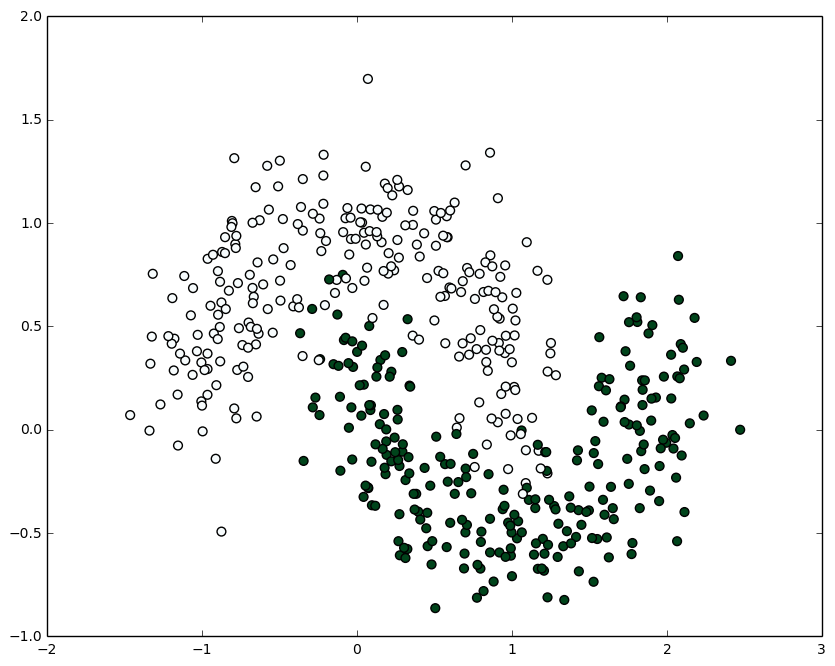

In [3]:
#read the datasets
train = pd.read_csv("DL/notebooks/intro_to_ann.csv")
print (train.head())
X, y = np.array(train.ix[:,0:2]), np.array(train.ix[:,2])
print(X.shape, y.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.BuGn)

# Function to generate a random number, given two numbers
When we initialize the neural networks, the weights have to be randomly assigned.

In [4]:
# calculate a random number where:  a <= rand < b
def rand(a, b):
    return (b-a)*random.random() + a

# Make a matrix 
def makeMatrix(I, J, fill=0.0):
    return np.zeros([I,J])

# our sigmoid function
def sigmoid(x):
    #return math.tanh(x)
    return 1/(1+np.exp(-x))

# derivative of our sigmoid function, in terms of the output (i.e. y)
def dsigmoid(y):
    return (y * (1- y))

When we first create a neural networks architecture, we need to know the number of inputs, number of hidden layers and number of outputs.
The weights have to be randomly initialized.# 

In [5]:
class NN:
    def __init__(self, ni, nh, no):
        # number of input, hidden, and output nodes
        self.ni = ni + 1 # +1 for bias node
        self.nh = nh
        self.no = no

        # activations for nodes
        self.ai = [1.0]*self.ni
        self.ah = [1.0]*self.nh
        self.ao = [1.0]*self.no
        
        # create weights
        self.wi = makeMatrix(self.ni, self.nh)
        self.wo = makeMatrix(self.nh, self.no)
        
        # set them to random vaules
        for i in range(self.ni):
            for j in range(self.nh):
                self.wi[i][j] = rand(-0.2, 0.2)
        for j in range(self.nh):
            for k in range(self.no):
                self.wo[j][k] = rand(-2.0, 2.0)

        # last change in weights for momentum   
        self.ci = makeMatrix(self.ni, self.nh)
        self.co = makeMatrix(self.nh, self.no)

In [6]:
class NN:
    def __init__(self, ni, nh, no):
        # number of input, hidden, and output nodes
        self.ni = ni + 1 # +1 for bias node
        self.nh = nh
        self.no = no

        # activations for nodes
        self.ai = [1.0]*self.ni
        self.ah = [1.0]*self.nh
        self.ao = [1.0]*self.no
        
        # create weights
        self.wi = makeMatrix(self.ni, self.nh)
        self.wo = makeMatrix(self.nh, self.no)
        
        # set them to random vaules
        for i in range(self.ni):
            for j in range(self.nh):
                self.wi[i][j] = rand(-0.2, 0.2)
        for j in range(self.nh):
            for k in range(self.no):
                self.wo[j][k] = rand(-2.0, 2.0)

        # last change in weights for momentum   
        self.ci = makeMatrix(self.ni, self.nh)
        self.co = makeMatrix(self.nh, self.no)
        

    def backPropagate(self, targets, N, M):
        
        if len(targets) != self.no:
            print(targets)
            raise ValueError('wrong number of target values')

        # calculate error terms for output
        #output_deltas = [0.0] * self.no
        output_deltas = np.zeros(self.no)
        for k in range(self.no):
            error = targets[k]-self.ao[k]
            output_deltas[k] = dsigmoid(self.ao[k]) * error

        # calculate error terms for hidden
        
        #hidden_deltas = [0.0] * self.nh
        hidden_deltas = np.zeros(self.nh)
        for j in range(self.nh):
            error = 0.0
            for k in range(self.no):
                error = error + output_deltas[k]*self.wo[j][k]
            hidden_deltas[j] = dsigmoid(self.ah[j]) * error

        # update output weights
        for j in range(self.nh):
            for k in range(self.no):
                change = output_deltas[k]*self.ah[j]
                self.wo[j][k] = self.wo[j][k] + N*change + M*self.co[j][k]
                self.co[j][k] = change
                #print N*change, M*self.co[j][k]

        # update input weights
        for i in range(self.ni):
            for j in range(self.nh):
                change = hidden_deltas[j]*self.ai[i]
                self.wi[i][j] = self.wi[i][j] + N*change + M*self.ci[i][j]
                self.ci[i][j] = change

        # calculate error
        error = 0.0
        for k in range(len(targets)):
            error = error + 0.5*(targets[k]-self.ao[k])**2
        return error


    def test(self, patterns):
        self.predict = np.empty([len(patterns), self.no])
        for i, p in enumerate(patterns):
            self.predict[i] = self.activate(p)
            #self.predict[i] = self.activate(p[0])

    def weights(self):
        print('Input weights:')
        for i in range(self.ni):
            print(self.wi[i])
        
        print('Output weights:')
        for j in range(self.nh):
            print(self.wo[j])
            
    def activate(self, inputs):
        
        if len(inputs) != self.ni-1:
            print(inputs)
            raise ValueError('wrong number of inputs')

        # input activations
        for i in range(self.ni-1):
            #self.ai[i] = sigmoid(inputs[i])
            self.ai[i] = inputs[i]
            
        

        # hidden activations
        for j in range(self.nh):
            sum = 0.0
            for i in range(self.ni):
                sum = sum + self.ai[i] * self.wi[i][j]
            self.ah[j] = sigmoid(sum)
           
        # output activations
        for k in range(self.no):
            sum = 0.0
            for j in range(self.nh):
                sum = sum + self.ah[j] * self.wo[j][k]
            self.ao[k] = sigmoid(sum)

        
        return self.ao[:]
    
    def train(self, patterns, iterations=1000, N=0.5, M=0.1):
        # N: learning rate
        # M: momentum factor
        patterns = list(patterns)
        for i in range(iterations):
            error1 = 0.0
            #j = 0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.activate(inputs)
                error1 = error1 + self.backPropagate([targets], N, M)
                #j= j+1
                #print (j)
                #self.weights()    
            #if i % 5 == 0:
            print('error in iiteration %d : %-.5f' % (i,error1))
            #print('Final training error: %-.5f' % error1)

# Observe the result

In [7]:
# Helper function to plot a decision boundary.
# This generates the contour plot to show the decision boundary visually
def plot_decision_boundary(nn_model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    nn_model.test(np.c_[xx.ravel(), yy.ravel()])
    Z = nn_model.predict
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.BuGn)

# Create neural network 

In [26]:
n = NN(2, 4, 1)

In [27]:
print (n.weights())

Input weights:
[-0.12116205 -0.12020026  0.19810601  0.15632348]
[-0.12233468  0.0258498  -0.16595999 -0.07318872]
[-0.0635423   0.0150728   0.17174973  0.12360777]
Output weights:
[ 0.13673366]
[ 1.14432022]
[-0.06416385]
[ 0.92224131]
None


In [28]:
print ("prediction")
print ("y=1 --- yhat=",n.activate([2.067788, 0.258133]))
print ("y=1 --- yhat=",n.activate([0.993994, 0.258133]))
print ("y=0 --- yhat=",n.activate([-0.690315, 0.749921]))
print ("y=0 --- yhat=",n.activate([1.023582, 0.529003]))
print ("y=1 --- yhat=",n.activate([0.700747, -0.496724]))

prediction
y=1 --- yhat= [0.74687503085495455]
y=1 --- yhat= [0.74814448864298289]
y=0 --- yhat= [0.7489601733812653]
y=0 --- yhat= [0.74756156186078448]
y=1 --- yhat= [0.75000993862551701]


error in iiteration 0 : 39.41680
error in iiteration 1 : 25.68889
error in iiteration 2 : 24.86920
error in iiteration 3 : 24.77001
error in iiteration 4 : 24.75443
error in iiteration 5 : 24.74715
error in iiteration 6 : 24.73647
error in iiteration 7 : 24.72156
error in iiteration 8 : 24.70357
error in iiteration 9 : 24.68377
error in iiteration 10 : 24.66317
error in iiteration 11 : 24.64251
error in iiteration 12 : 24.62230
error in iiteration 13 : 24.60290
error in iiteration 14 : 24.58452
error in iiteration 15 : 24.56730
error in iiteration 16 : 24.55131
error in iiteration 17 : 24.53656
error in iiteration 18 : 24.52303
error in iiteration 19 : 24.51065
error in iiteration 20 : 24.49937
error in iiteration 21 : 24.48910
error in iiteration 22 : 24.47973
error in iiteration 23 : 24.47118
error in iiteration 24 : 24.46336
error in iiteration 25 : 24.45617
error in iiteration 26 : 24.44952
error in iiteration 27 : 24.44335
error in iiteration 28 : 24.43757
error in iiteration 29 :

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


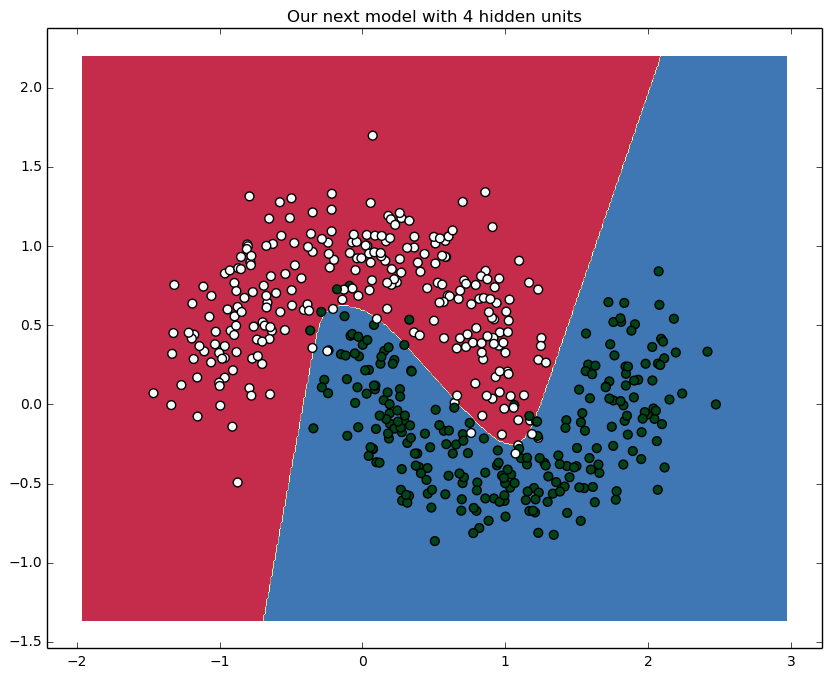

In [29]:
%timeit -n 1 -r 1 n.train(zip(X,y), iterations=1000)
plot_decision_boundary(n)
plt.title("Our next model with 4 hidden units")

In [30]:
print (n.weights())

Input weights:
[ -6.91377305 -10.0985927    8.94665596   8.9714853 ]
[  1.41401658 -12.09299175   6.14725427  -3.43163688]
[ -2.74627185   6.39238033  -5.86965163 -11.31238795]
Output weights:
[-9.60761503]
[ 5.01853559]
[-3.78923533]
[ 7.92899817]
None
